### IMPORTANDO BIBLIOTECAS/MÓDULOS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import joblib

### CRIANDO SÉRIE TEMPORAL

In [3]:
np.random.seed(0)
data = np.random.normal(3000,1,100)
serie = pd.DataFrame(data, columns=['Serie'])

### ANALISANDO SÉRIE TEMPORAL

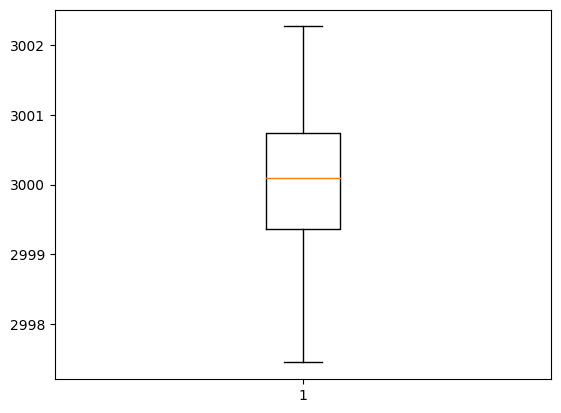

In [3]:
plt.boxplot(serie)
plt.show()

<Axes: >

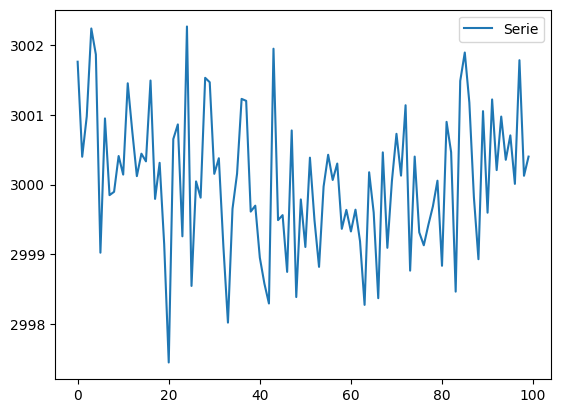

In [4]:
serie.plot()

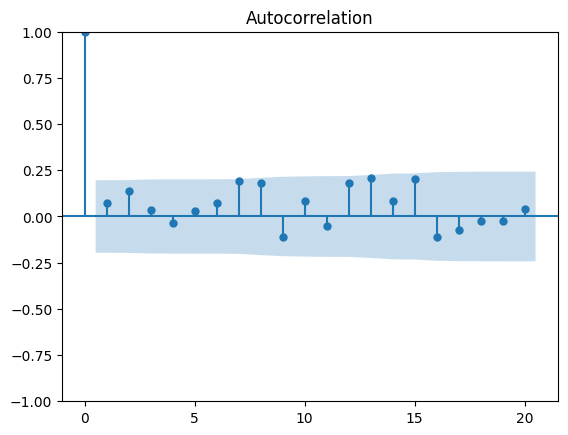

In [4]:
plot_acf(serie, lags=20)
plt.show()

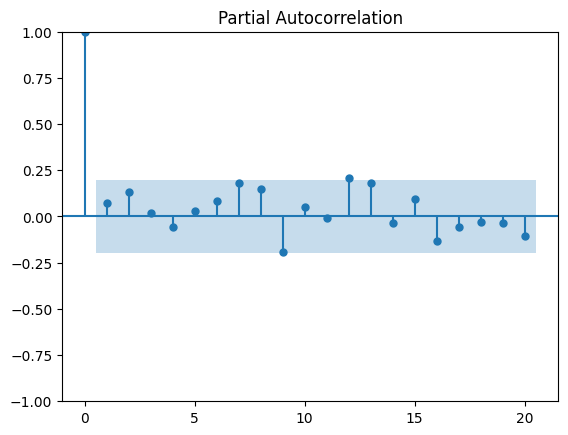

In [5]:
plot_pacf(serie, lags=20)
plt.show()

### DEFININDO BASE TREINO E TESTE

In [5]:
Treino = serie['Serie'][:int(len(serie) * 0.8)]
Teste = serie['Serie'][int(len(serie) * 0.8):]

print(Treino.shape)
print(Teste.shape)

(80,)
(20,)


### CONFIGURANDO E TREINANDO MODELOS ARIMA E SARIMAX

###### NO MODELO ARIMA, NÃO FOI NECESSÁRIO INCLUIR DIFERENCIAÇÃO, POIS A SÉRIE É ESTACIONÁRIA, TORNANDO O MODELO COMO 'ARMA'

In [6]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sa
import warnings

warnings.filterwarnings('ignore')

order_arima = (30,0,1)
order_sa = (15,1,1)
seasonal_order = (3,0,1,16)

modelo_sa = sa.tsa.SARIMAX(Treino, order=order_sa, seasonal_order=seasonal_order)
modelo = ARIMA(Treino,order=order_arima)

modelo_fit = modelo.fit()
modelo_sa_fit = modelo_sa.fit()

### AVALIANDO TREINAMENTO DOS MODELOS ARIMA E SARIMAX

In [7]:
residuals = pd.DataFrame(modelo_fit.resid)
residuals_sa = pd.DataFrame(modelo_sa_fit.resid)

In [8]:
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Serie   No. Observations:                   80
Model:                ARIMA(30, 0, 1)   Log Likelihood                 -94.864
Date:                Mon, 11 Sep 2023   AIC                            255.728
Time:                        19:48:09   BIC                            334.334
Sample:                             0   HQIC                           287.243
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3000.1254      0.385   7785.163      0.000    2999.370    3000.881
ar.L1         -0.8070      0.250     -3.222      0.001      -1.298      -0.316
ar.L2          0.2584      0.200      1.295      0.1

In [9]:
print(modelo_sa_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Serie   No. Observations:                   80
Model:             SARIMAX(15, 1, 1)x(3, 0, 1, 16)   Log Likelihood                 -99.621
Date:                             Mon, 11 Sep 2023   AIC                            241.242
Time:                                     19:48:10   BIC                            291.000
Sample:                                          0   HQIC                           261.176
                                              - 80                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0156      0.190     -0.082      0.935      -0.388       0.357
ar.L2          0.1011      

<Axes: ylabel='Density'>

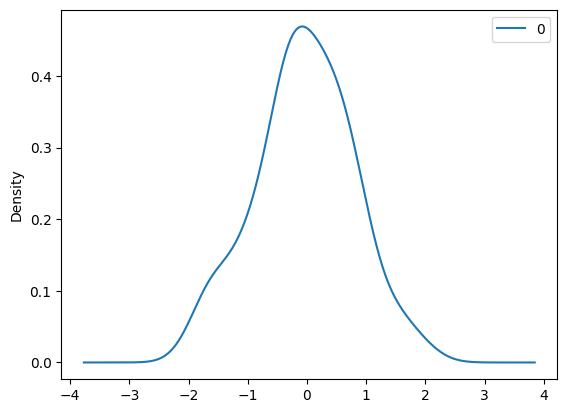

In [10]:
residuals.plot(kind='kde')

<Axes: ylabel='Density'>

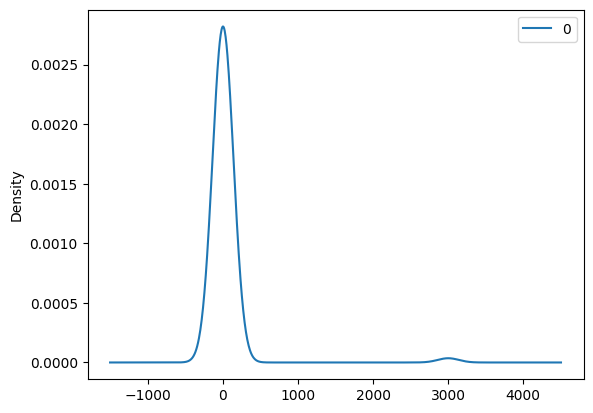

In [11]:
residuals_sa.plot(kind='kde')

### REALIZANDO PREVISÕES E COMPARANDO COM A BASE

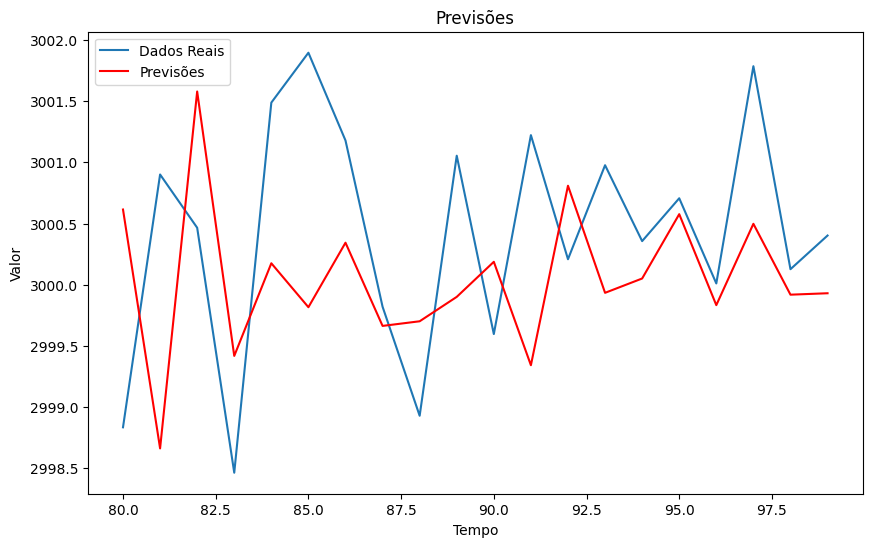

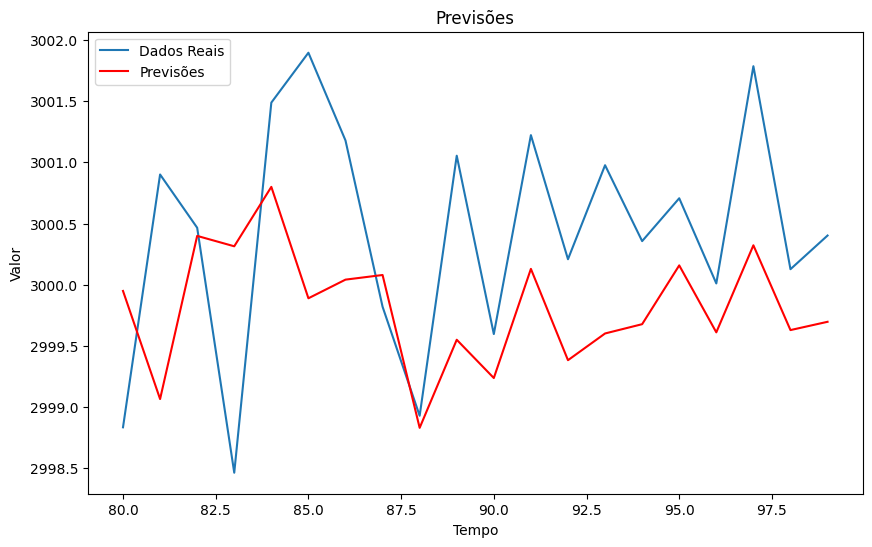

In [12]:
n_forecast = len(Teste)
forecast = modelo_fit.forecast(steps=n_forecast)
forcast_sa = modelo_sa_fit.forecast(steps=n_forecast)

modelos = [forecast,forcast_sa]

for modelo in modelos:

    plt.figure(figsize=(10, 6))
    plt.plot(Teste.index, Teste, label='Dados Reais')
    plt.plot(Teste.index, modelo, color='red', label='Previsões')
    plt.title('Previsões')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()

### SALVANDO MODELOS

In [13]:
joblib.dump(modelo_fit,'arima.pkl')
joblib.dump(modelo_sa_fit,'sarimax.pkl')

['sarimax.pkl']

In [14]:
arima = joblib.load('arima.pkl')
sarima = joblib.load('sarimax.pkl')